# CS 2803 Final Project
# Lauren Kearley and Jacob Meyers

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "palettes")))
sns.set_palette(sns.color_palette("BrBG", 2))
df = pd.read_csv('play_year.csv', index_col=1)

#### Graph showing number of pass and run plays per NFL season

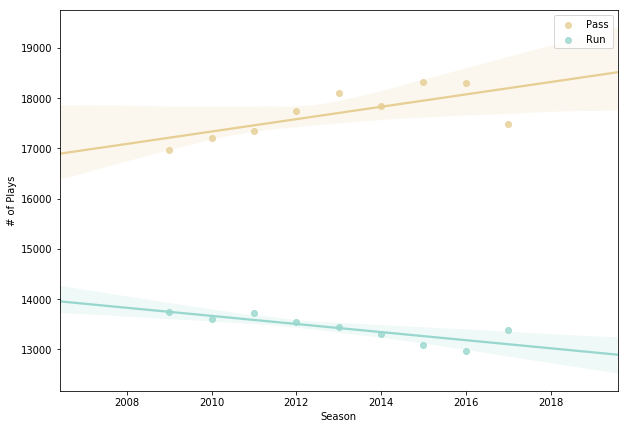

In [59]:
play_per_season = df.groupby(['Season', 'PlayType']).size()
play_per_season = play_per_season.to_frame(name = 'size').reset_index()
pass_season = play_per_season.loc[play_per_season['PlayType'].isin(['Pass'])]
pass_season = pass_season.rename(columns={'size':'PassPerSeason'})
pass_season = pass_season.drop(['PlayType'], axis=1)
pass_season = pass_season.reset_index()
run_season = play_per_season.loc[play_per_season['PlayType'].isin(['Run'])].reset_index()
data = pass_season
data['RunPerSeason'] = run_season[['size']]
data = data.drop(['index'], axis=1)
#print(data)
fig, axs = plt.subplots()
sns.regplot(x='Season', y='PassPerSeason', data=data, ax=axs, label="Pass")
sns.regplot(x='Season', y='RunPerSeason', data=data, ax=axs, label="Run")
axs.legend()
axs.set(xlabel='Season', ylabel='# of Plays')
fig.set_size_inches(10, 7)
plt.show()

#### Pie charts of pass vs run plays per NFL season

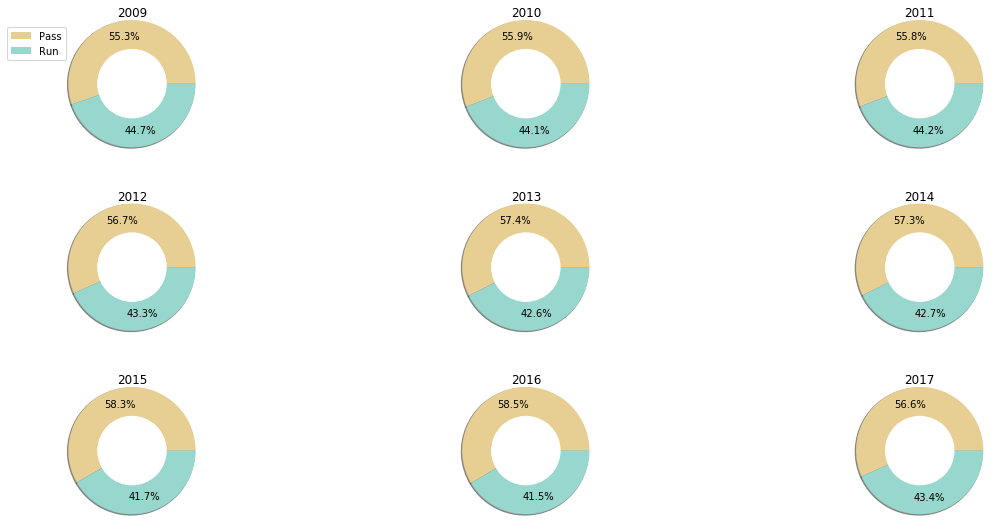

In [60]:
newData = data.copy()
newData = newData.set_index('Season')
doughnut_cutout = plt.Circle( (0,0), 0.7, color='white')
#print(newData)
start_date = 2009
fig, axes = plt.subplots(3,3, figsize=(20,9))
for i in range(int(len(newData.index)/3)):
    for j in range(int(len(newData.index)/3)):
        doughnut_cutout = plt.Circle( (0,0), 0.7, color='white')
        ax = axes[i][j]
        pie = ax.pie(newData.loc[start_date],shadow=True, autopct='%.1f%%',pctdistance=0.75, radius=1.3)
        ax.set(ylabel='', title=start_date, aspect='equal')
        start_date = start_date + 1
        ax.add_artist(doughnut_cutout)
axes[0][0].legend(bbox_to_anchor=(0, 1), labels=['Pass','Run'])
fig.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()